# Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/dsrscientist/dataset4

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# importing require library
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
from sklearn.model_selection import train_test_split

In [3]:
#importing data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data analysis

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


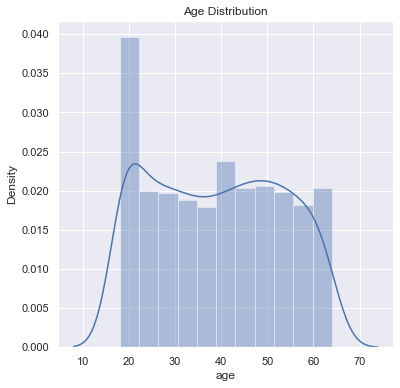

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

#### Most insurance holder age around  20 to 23

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


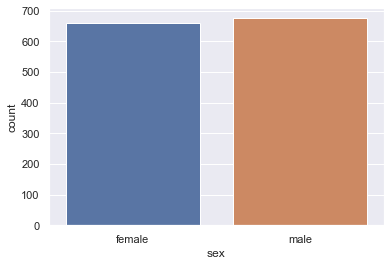

In [9]:
# how male and female are there
sns.countplot('sex', data=df)
plt.show()

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


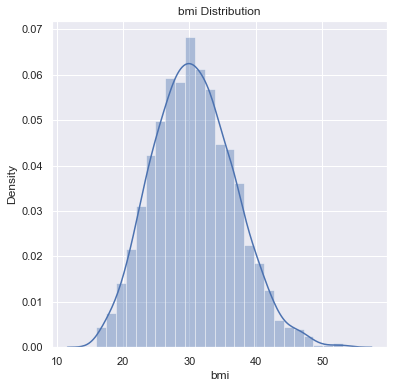

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

* normal BMI range is 18.5 to 24.9
* if BMI is 30.0 or higher it falls within the obese range
* in our data set most people is near to obese range they are over weight

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


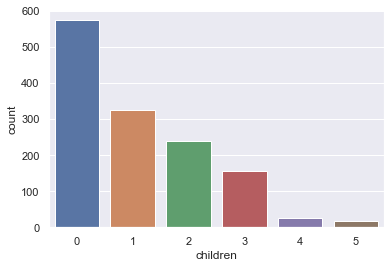

In [12]:
# how many have children
sns.countplot('children', data=df)
plt.show()

In [13]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

* we have more people who do not have chaild
* and 324 people with 1 chaild

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


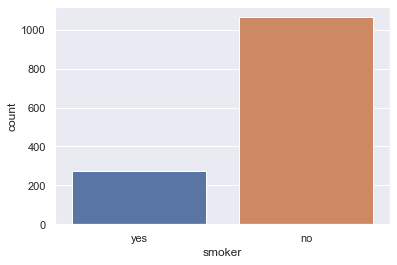

In [14]:
# how many people smok
sns.countplot('smoker', data=df)
plt.show()

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


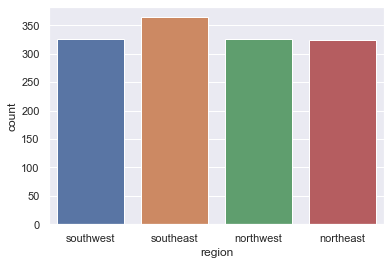

In [16]:
# region
sns.countplot('region', data=df)
plt.show()

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


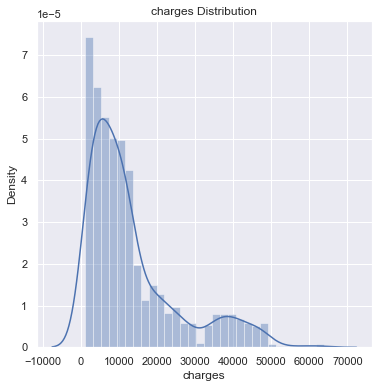

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

## Encoding columns

In [19]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding region column
df.replace({'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3}}, inplace=True)

In [20]:
x = df.drop(columns='charges', axis=1)
y = df['charges']

In [21]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       2
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       1
4      32    0  28.880         0       1       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       1
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       2
1337   61    1  29.070         0       0       1

[1338 rows x 6 columns]


## Splitting Dataset

In [22]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=5)

In [23]:
y_train

1167     4529.47700
531     14043.47670
657      4058.71245
234      6710.19190
544     10231.49990
           ...     
73      11946.62590
1142    27117.99378
998      6551.75010
206     11743.29900
867     11576.13000
Name: charges, Length: 1003, dtype: float64

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1003, 6) (335, 6)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
lr.score(x_train,y_train)

0.7453470202775898

In [29]:
lr.score(x_test,y_test)

0.761909465842713

In [30]:
y_pred=lr.predict(x_test)

In [31]:
r2_score(y_test,y_pred)

0.761909465842713

In [34]:
input_data = (27,0,42.13,0,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is ', prediction[0])

[31800.29550809]
The insurance cost is  31800.295508089774


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
